<a href="https://colab.research.google.com/github/Rosie-Ping/HyperMarket/blob/main/HyperMarket_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/Shared drives/MSBA 446 Second Half/2-2B/train_modified.csv')

In [ ]:
df = data.drop(columns = ['Item_Identifier','Outlet_Establishment_Year','RNUM','GROUP'])

In [ ]:
from sklearn.model_selection import train_test_split

Y = df['Item_Outlet_Sales']
X = df.drop(columns = 'Item_Outlet_Sales')

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

In [ ]:
print(len(x_train))

4473


In [ ]:
print(len(y_train))

4473


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold

In [ ]:
#implement Random Forest Regressor
# Run CV
rf_rmse = []

model = RandomForestRegressor()
cv = KFold(n_splits=4,random_state=150307, shuffle=False)
probs_rf = np.zeros(shape=(len(y_test),))

for train_index, test_index in cv.split(X):
    print("Train Index: ", len(train_index))

    print("Test Index: ", test_index, "\n")

    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], Y.iloc[train_index], Y.iloc[test_index]

    rf = model.fit(X_train, y_train)
 #   probs_rf += rf.predict_proba(X_test)[:,1]
    y_pred = rf.predict(X_test)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:', RMSE)
    rf_rmse.append(RMSE)

print(rf_rmse)
print(np.mean(rf_rmse))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Train Index:  4792
Test Index:  [   0    1    2 ... 1595 1596 1597] 

1598
1598
RMSE: 1141.6665163104053
Train Index:  4792
Test Index:  [1598 1599 1600 ... 3193 3194 3195] 

1598
1598
RMSE: 1122.0132526799612
Train Index:  4793
Test Index:  [3196 3197 3198 ... 4790 4791 4792] 

1597
1597
RMSE: 1108.8091947848588
Train Index:  4793
Test Index:  [4793 4794 4795 ... 6387 6388 6389] 

1597
1597
RMSE: 1158.733396440708
[1141.6665163104053, 1122.0132526799612, 1108.8091947848588, 1158.733396440708]
1132.8055900539835


In [ ]:
print(probs_rf)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 1149.3946910839477


#Linear Regression

In [ ]:
LR = LinearRegression(normalize=True)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 1160.3973260283235


In [ ]:
#CV-Linear Regression
LR_rmse = []

model = LinearRegression(normalize=True)
cv = KFold(n_splits=6,random_state=150307, shuffle=False)
probs_rf = np.zeros(shape=(len(y_test),))

for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index)

    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], Y.iloc[train_index], Y.iloc[test_index]


    lr = model.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:', RMSE)
    LR_rmse.append(RMSE)

print(LR_rmse)
print(np.mean(LR_rmse))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Train Index:  [1065 1066 1067 ... 6387 6388 6389]
RMSE: 433.7314065630946
Train Index:  [   0    1    2 ... 6387 6388 6389]
RMSE: 421.26046434931027
Train Index:  [   0    1    2 ... 6387 6388 6389]
RMSE: 421.7831425713131
Train Index:  [   0    1    2 ... 6387 6388 6389]
RMSE: 424.2701912444423
Train Index:  [   0    1    2 ... 6387 6388 6389]
RMSE: 890.4215277231629
Train Index:  [   0    1    2 ... 5322 5323 5324]
RMSE: 1141.6631346225847
[433.7314065630946, 421.26046434931027, 421.7831425713131, 424.2701912444423, 890.4215277231629, 1141.6631346225847]
622.1883111789847


(array([1.325e+03, 1.151e+03, 1.024e+03, 7.820e+02, 6.770e+02, 4.680e+02,
        3.380e+02, 2.220e+02, 1.730e+02, 9.400e+01, 5.700e+01, 3.400e+01,
        2.100e+01, 6.000e+00, 1.000e+01, 4.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([   33.29   ,   685.97374,  1338.65748,  1991.34122,  2644.02496,
         3296.7087 ,  3949.39244,  4602.07618,  5254.75992,  5907.44366,
         6560.1274 ,  7212.81114,  7865.49488,  8518.17862,  9170.86236,
         9823.5461 , 10476.22984, 11128.91358, 11781.59732, 12434.28106,
        13086.9648 ]),
 <a list of 20 Patch objects>)

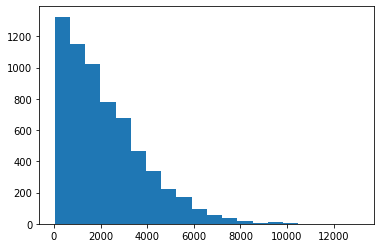

In [ ]:
plt.hist(Y,bins = 20)

<bound method NDFrame.describe of 0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
6385    2778.3834
6386     549.2850
6387    1193.1136
6388    1845.5976
6389     765.6700
Name: Item_Outlet_Sales, Length: 6390, dtype: float64>

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt = PowerTransformer()


pt.fit(Y)
pt_Y = pt.transform(Y)
plt.hist(pt_Y,bins = 20)

ValueError: ignored

#XGBOOST

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [ ]:
'''
df_xgb = data.drop(columns = ['Outlet_Establishment_Year','RNUM','GROUP'])
Y = df_xgb['Item_Outlet_Sales']
X = df_xgb.drop(columns = 'Item_Outlet_Sales')

In [ ]:
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[02:57:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 1106.8732668627604


#MLP

In [ ]:
Y = data['Item_Outlet_Sales']
X = data.drop(columns = 'Item_Outlet_Sales')

In [ ]:
#exclude Item_Identifier
X = X.drop(columns='Item_Identifier')

In [ ]:
#Item_Identifier dummies
X = pd.get_dummies(X,columns=['Item_Identifier'])
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,RNUM,GROUP,Outlet_Years,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2.1,Outlet_Location_Type_Tier 3.1,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Identifier_0,...,Item_Identifier_1519,Item_Identifier_1520,Item_Identifier_1521,Item_Identifier_1522,Item_Identifier_1523,Item_Identifier_1524,Item_Identifier_1525,Item_Identifier_1526,Item_Identifier_1527,Item_Identifier_1528,Item_Identifier_1529,Item_Identifier_1530,Item_Identifier_1531,Item_Identifier_1532,Item_Identifier_1533,Item_Identifier_1534,Item_Identifier_1535,Item_Identifier_1536,Item_Identifier_1537,Item_Identifier_1538,Item_Identifier_1539,Item_Identifier_1540,Item_Identifier_1541,Item_Identifier_1542,Item_Identifier_1543,Item_Identifier_1544,Item_Identifier_1545,Item_Identifier_1546,Item_Identifier_1547,Item_Identifier_1548,Item_Identifier_1549,Item_Identifier_1550,Item_Identifier_1551,Item_Identifier_1552,Item_Identifier_1553,Item_Identifier_1554,Item_Identifier_1555,Item_Identifier_1556,Item_Identifier_1557,Item_Identifier_1558
0,9.300,0.016047,249.8092,1999,0.139644,1,21,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.920,0.019278,48.2692,2009,0.431302,1,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,17.500,0.016760,141.6180,1999,0.612179,1,21,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19.200,0.000000,182.0950,1998,0.290753,1,22,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,1987,0.155732,1,33,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,6.865,0.056783,214.5218,1987,0.399665,1,33,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6386,8.380,0.046982,108.1570,2002,0.511642,1,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6387,10.600,0.035186,85.1224,2004,0.478188,1,16,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6388,7.210,0.145221,103.1332,2009,0.061866,1,11,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)
x_train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,RNUM,GROUP,Outlet_Years,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2.1,Outlet_Location_Type_Tier 3.1,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3969,275,10.195,0.042113,42.5428,2009,0.179163,1,11,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
4510,957,7.000,0.151713,104.8280,2002,0.517602,1,18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
292,1123,9.000,0.065237,176.4370,2004,0.614490,1,16,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
5080,925,5.940,0.029372,186.7556,1997,0.530806,1,23,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3077,163,16.500,0.068403,101.9990,2009,0.555133,1,11,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,721,13.150,0.038030,88.6856,2002,0.514934,1,18,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
5695,22,18.750,0.041741,98.3042,1985,0.638957,1,35,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1361,744,11.500,0.000000,128.4652,1999,0.696338,1,21,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1547,939,11.395,0.069587,234.6616,1997,0.729257,1,23,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 1203.1054942610215


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(40,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
# Compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
# Fit the model
model.fit(x_train, y_train, epochs=100, batch_size=16, verbose=0)
# Evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)

In [ ]:
#exclude 'Item_Identifier'
np.sqrt(scores)

array([1226.86169758, 1226.86169758])

In [ ]:
#include Item_Identifier int
np.sqrt(scores)

array([1159.50662999, 1159.50662999])

In [ ]:
#include Item_Identifier dummies
np.sqrt(scores)

array([1155.08625219, 1155.08625219])

Use XGBoost Model for test data prediction

In [ ]:
testdata= pd.read_csv('/content/drive/Shared drives/MSBA 446 Second Half/2-2B/test_modified.csv')

NameError: ignored

In [ ]:
test = testdata.drop(columns = ['Item_Identifier','Outlet_Establishment_Year','GROUP',
                  'Item_Outlet_Sales','Item_Fat_Content_Low Fat','Item_Fat_Content_low fat',
                  'Item_Fat_Content_reg'])
test_pred = xgb.predict(test)

In [ ]:
test_pred
testdata['predicted_Outlet_Sales'] = test_pred
testdata.to_csv("/content/drive/Shared drives/MSBA 446 Second Half/2-2B/tests_prediction.csv",index=False)